In [1]:
data_abortion <- read.csv("abortion_rate.csv")

In [2]:
str(data_abortion)

'data.frame':	50 obs. of  10 variables:
 $ state     : Factor w/ 50 levels "ALABAMA","ALASKA",..: 24 31 44 48 4 18 40 26 36 1 ...
 $ abortion  : num  12.4 17.7 9.3 7.7 13.5 ...
 $ religion  : num  38 44.7 76.7 9.8 30 ...
 $ price     : int  256 332 298 251 248 228 292 329 281 272 ...
 $ laws      : int  0 0 1 0 1 1 1 0 0 1 ...
 $ funds     : int  0 0 0 1 0 0 0 0 0 0 ...
 $ educ      : num  64.3 75.1 85.1 66 66.3 ...
 $ income    : int  14082 15458 15573 15598 15635 15931 16212 16227 16420 16522 ...
 $ picket    : int  100 20 0 50 33 60 57 50 75 89 ...
 $ lnabortion: num  2.52 2.87 2.23 2.04 2.6 ...


    yang mau dimodelkan abortion
    observation-nya state

In [4]:
head(data_abortion)

state,abortion,religion,price,laws,funds,educ,income,picket,lnabortion
MISSISSIPPI,12.4,38.0,256,0,0,64.3,14082,100,2.517696
NEW_MEXICO,17.7,44.7,332,0,0,75.1,15458,20,2.873565
UTAH,9.3,76.7,298,1,0,85.1,15573,0,2.230014
WEST_VIRGINIA,7.7,9.8,251,0,1,66.0,15598,50,2.041220
ARKANSAS,13.5,30.0,248,1,0,66.3,15635,33,2.602690
LOUISIANA,13.4,50.9,228,1,0,68.3,15931,60,2.595255


In [5]:
data_abortion <- subset(data_abortion, select= -c(state, lnabortion))

In [6]:
head(data_abortion)

abortion,religion,price,laws,funds,educ,income,picket
12.4,38.0,256,0,0,64.3,14082,100
17.7,44.7,332,0,0,75.1,15458,20
9.3,76.7,298,1,0,85.1,15573,0
7.7,9.8,251,0,1,66.0,15598,50
13.5,30.0,248,1,0,66.3,15635,33
13.4,50.9,228,1,0,68.3,15931,60


### Add Missing Value

In [7]:
colSums(is.na(data_abortion))

abortion religion    price     laws    funds     educ   income   picket 
       0        0        0        0        0        0        0        0

# Plotting

In [8]:
library(ggplot2)

In [12]:
options(repr.plot.width=4, repr.plot.height=4) # Mengatur panjang dan lebar dari plot yang akan dibuat

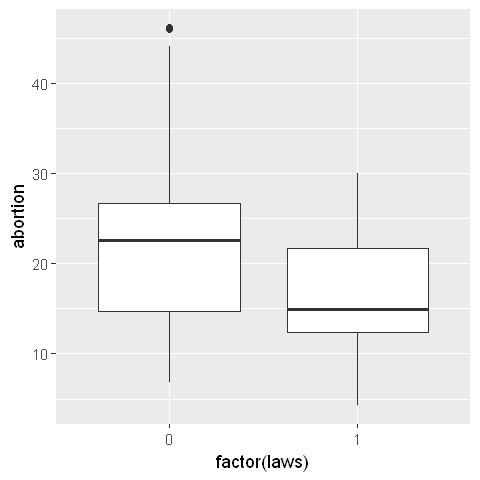

In [13]:
p10 <- ggplot(data_abortion, aes(x =  factor(laws) , y = abortion)) +
        geom_boxplot()
p10

In [14]:
p10 <- ggplot(data_abortion, aes(x =  factor(funds) , y = abortion)) +
        geom_boxplot()

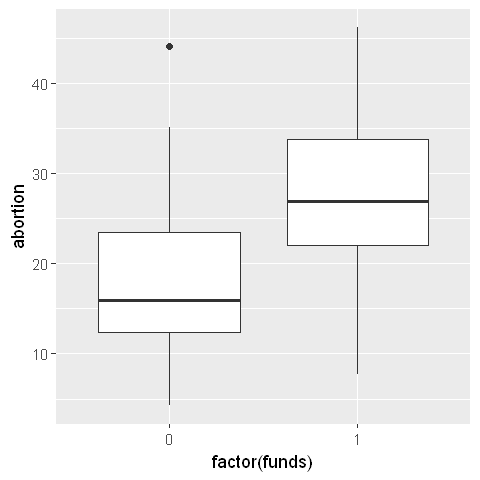

In [15]:
p10

In [16]:
numeric <- subset(data_abortion, select= -c(laws, funds))

In [18]:
nrow(data_abortion)

[1] 50

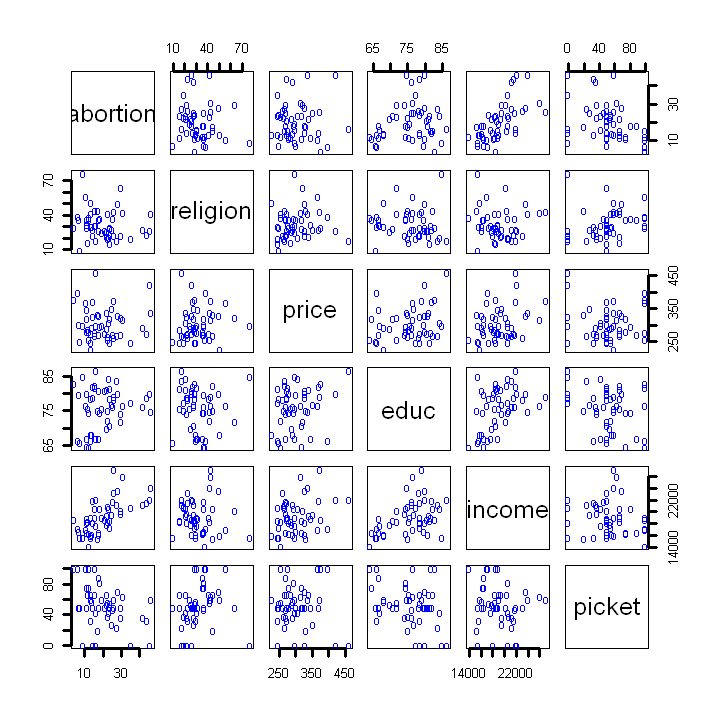

In [27]:
options(repr.plot.width=6, repr.plot.height=6) # Mengatur panjang dan lebar dari plot yang akan dibuat
pairs(numeric, pch="o", col="blue",lwd=3)

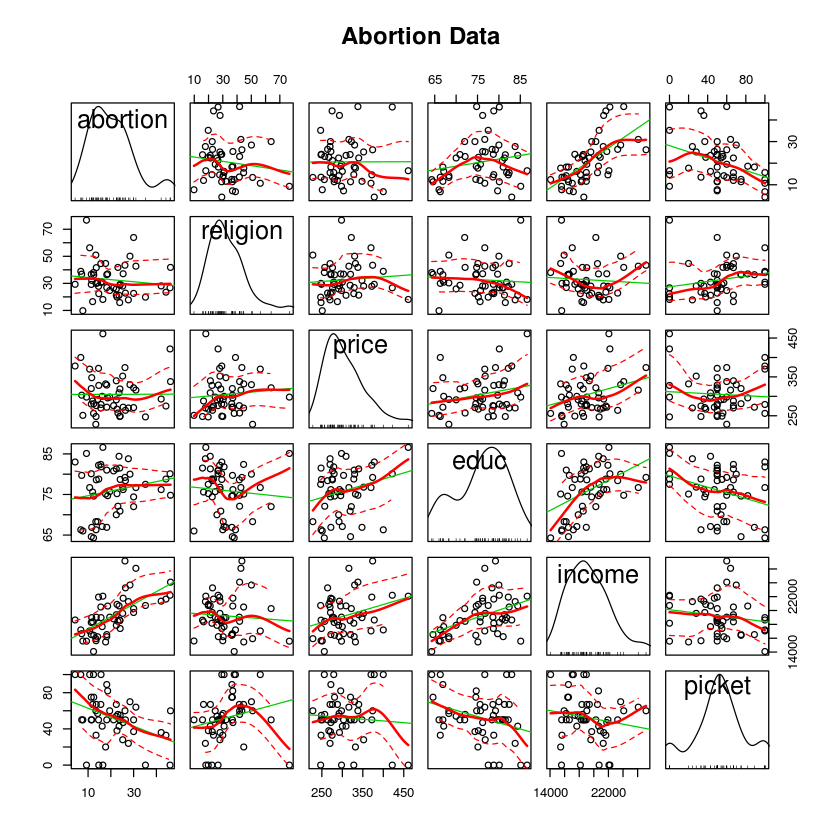

In [266]:
library(car)
scatterplotMatrix(~abortion + religion + price + educ + income + picket, data=numeric ,
  	main="Abortion Data")

### Linear Regression

In [267]:
model <- lm(abortion ~ . + I(income**2), data = data_abortion)
summary(model)


Call:
lm(formula = abortion ~ . + I(income^2), data = data_abortion)

Residuals:
   Min     1Q Median     3Q    Max 
-9.947 -4.528 -1.790  3.993 15.555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.658e+01  4.516e+01  -1.474   0.1480  
religion     9.971e-02  9.381e-02   1.063   0.2940  
price       -4.200e-02  2.157e-02  -1.947   0.0584 .
laws        -1.968e+00  2.378e+00  -0.828   0.4126  
funds        4.501e+00  2.844e+00   1.583   0.1212  
educ        -3.872e-01  2.008e-01  -1.929   0.0607 .
income       1.109e-02  4.610e-03   2.405   0.0208 *
picket      -1.077e-01  4.122e-02  -2.613   0.0125 *
I(income^2) -2.166e-07  1.144e-07  -1.893   0.0655 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.855 on 41 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.5356 
F-statistic: 8.063 on 8 and 41 DF,  p-value: 1.822e-06


In [30]:
model <- lm(abortion ~ . + I(log(income)), data = data_abortion)
summary(model)


Call:
lm(formula = abortion ~ . + I(log(income)), data = data_abortion)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.116  -4.582  -1.901   4.088  15.739 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -1.324e+03  8.264e+02  -1.602   0.1169  
religion        8.970e-02  9.505e-02   0.944   0.3508  
price          -4.252e-02  2.181e-02  -1.950   0.0581 .
laws           -1.878e+00  2.413e+00  -0.778   0.4409  
funds           4.265e+00  2.873e+00   1.484   0.1454  
educ           -3.743e-01  2.031e-01  -1.843   0.0725 .
income         -5.278e-03  4.764e-03  -1.108   0.2743  
picket         -1.104e-01  4.158e-02  -2.655   0.0113 *
I(log(income))  1.512e+02  9.336e+01   1.619   0.1131  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.93 on 41 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5253 
F-statistic: 7.779 on 8 and 41 DF,  p-value: 2.74e-06


In [28]:
model <- lm(abortion ~ ., data = data_abortion)
summary(model)


Call:
lm(formula = abortion ~ ., data = data_abortion)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6110  -4.6493  -0.6696   4.5253  15.9514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.2839573 15.0776294   0.947   0.3489    
religion     0.0200709  0.0863805   0.232   0.8174    
price       -0.0423631  0.0222232  -1.906   0.0635 .  
laws        -0.8731018  2.3765662  -0.367   0.7152    
funds        2.8200030  2.7834747   1.013   0.3168    
educ        -0.2872551  0.1995545  -1.439   0.1574    
income       0.0024007  0.0004552   5.274 4.35e-06 ***
picket      -0.1168712  0.0421799  -2.771   0.0083 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.063 on 42 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 7 and 42 DF,  p-value: 2.847e-06


### Bootstrap

Panggil Library "boot"

In [31]:
library(boot)

Buat function untuk membuat bootstrap linear regression

In [32]:
coef.reg <- function(formula, data, indices) {
    d <- data[indices,] 
    fit <- lm(formula, data = d)
    return(fit$coefficients)
    } 

In [33]:
# bootstrapping with 1000 replications 
set.seed(1)
results <- boot(data = data_abortion, statistic = coef.reg, R = 10000,
                formula = abortion ~ .)


In [34]:
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_abortion, statistic = coef.reg, R = 10000, formula = abortion ~ 
    .)


Bootstrap Statistics :
        original        bias     std. error
t1* 14.283957280  3.035095e-01 1.574087e+01
t2*  0.020070901  8.794202e-03 9.426150e-02
t3* -0.042363106 -4.357808e-04 2.595358e-02
t4* -0.873101786  1.009173e-01 1.874060e+00
t5*  2.820003024  4.054946e-01 3.157501e+00
t6* -0.287255121  8.284621e-03 1.922984e-01
t7*  0.002400682 -3.839912e-05 5.382905e-04
t8* -0.116871214 -6.092593e-03 4.395420e-02

In [35]:
results$t0

(Intercept)     religion        price         laws        funds         educ 
14.283957280  0.020070901 -0.042363106 -0.873101786  2.820003024 -0.287255121 
      income       picket 
 0.002400682 -0.116871214

In [36]:
colnames(results$t) <- names(results$t0)

* Bootstrap Estimates of Regression Coefficient

In [37]:
coef_religion <- mean(results$t[, "religion"])
coef_religion

[1] 0.0288651

In [38]:
coef_price <- mean(results$t[, "price"])
coef_price

[1] -0.04279889

In [39]:
coef_laws <- mean(results$t[, "laws"])
coef_laws

[1] -0.7721845

In [40]:
coef_educ <- mean(results$t[, "educ"])
coef_educ

[1] -0.2789705

In [41]:
coef_income <- mean(results$t[, "income"])
coef_income

[1] 0.002362283

* Booststrap Estimates of Standard Errors

In [42]:
se_religion <- sd(results$t[, "religion"])
se_religion

[1] 0.0942615

In [43]:
se_price <- sd(results$t[, "price"])
se_price

[1] 0.02595358

In [44]:
se_laws <- sd(results$t[, "laws"])
se_laws

[1] 1.87406

In [45]:
se_educ <- sd(results$t[, "educ"])
se_educ

[1] 0.1922984

In [46]:
se_income <- sd(results$t[, "income"])
se_income

[1] 0.0005382905

* Bootstrap Estimates of Bias

In [47]:
bias_religion <- results$t0["religion"] - coef_religion
bias_religion

religion 
-0.008794202

In [48]:
bias_price <- results$t0["price"] - coef_price
bias_price

price 
0.0004357808

In [49]:
bias_laws <- results$t0["laws"] - coef_laws
bias_laws

laws 
-0.1009173

In [50]:
bias_educ <- results$t0["educ"] - coef_educ
bias_educ

educ 
-0.008284621

In [51]:
bias_income <- results$t0["income"] - coef_income
bias_income

income 
3.839912e-05

## t-stat

In [52]:
coef_price/se_price

[1] -1.649055

In [53]:
coef_income/se_income

[1] 4.388491

### Hypothesis Testing with Bootstrap

In [54]:
library(ggplot2)

### Price

In [55]:
mean(results$t[, "price"])

[1] -0.04279889

In [56]:
median(results$t[, "price"])

[1] -0.0441358

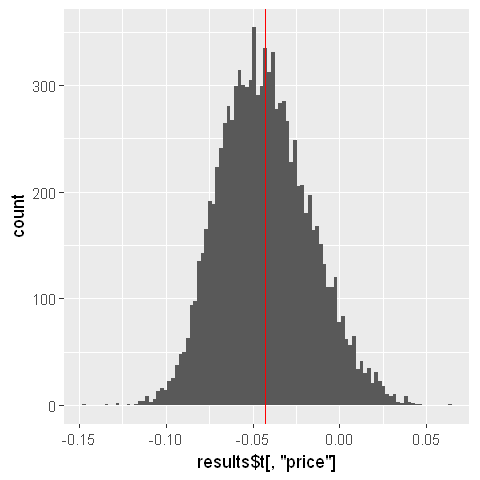

In [58]:
options(repr.plot.width=4, repr.plot.height=4) # Mengatur panjang dan lebar dari plot yang akan dibuat
qplot(results$t[, "price"], bins = 100) + geom_vline(xintercept = mean(results$t[, "price"]), color = "red")

In [62]:
t_boot_price <- results$t[, "price"]/se_price

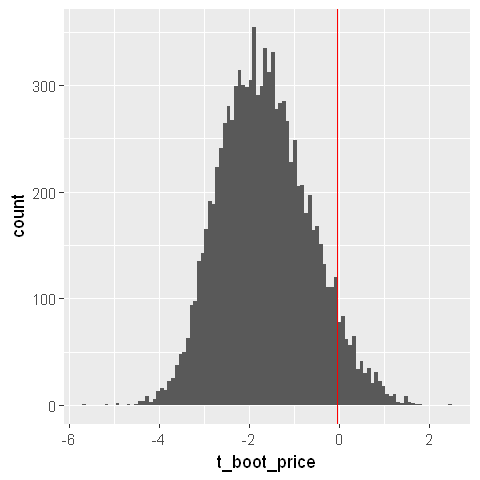

In [63]:
qplot(t_boot_price, bins = 100) + geom_vline(xintercept = mean(results$t[, "price"]), color = "red")

In [64]:
p1 <- sum(t_boot_price > 0)/10000
p1 

[1] 0.0581

In [65]:
t_H0 <- t_boot_price - mean(t_boot_price)

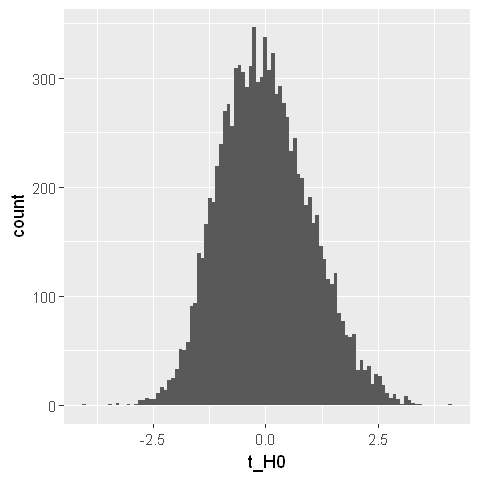

In [66]:
qplot(t_H0, bins = 100)

In [67]:
t_stat <- results$t0["price"] / se_price

In [68]:
t_stat

price 
-1.632264

In [69]:
p2 <- sum(t_H0 < t_stat) / 1000
p2*2

[1] 0.724

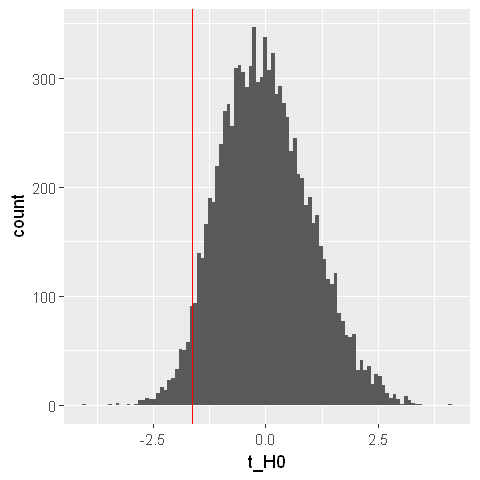

In [70]:
qplot(t_H0, bins = 100) + geom_vline(xintercept = t_stat, color = "red")

### Income

In [71]:
mean(results$t[, "income"])

[1] 0.002362283

In [72]:
p1 <- sum(t_boot_income < 0)/10000
p1

ERROR: Error in eval(expr, envir, enclos): object 't_boot_income' not found


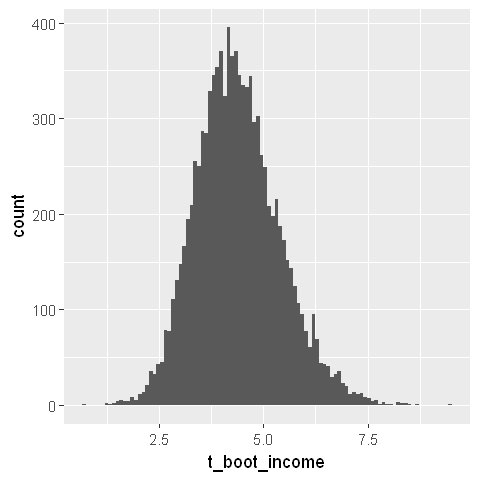

In [73]:
t_boot_income <- results$t[, "income"]/se_income
qplot(t_boot_income, bins = 100)

In [74]:
t_H0 <- t_boot_income - mean(t_boot_income)

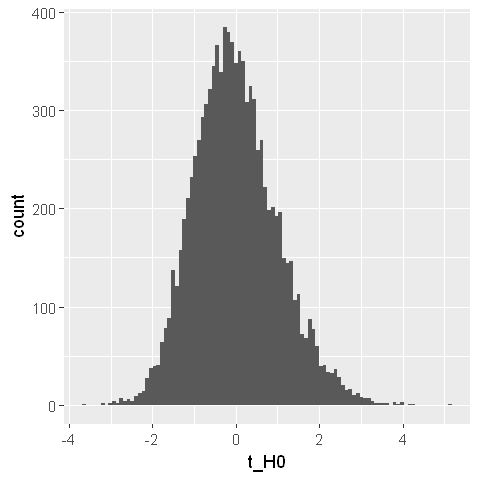

In [75]:
qplot(t_H0, bins = 100)

In [76]:
t_stat <- results$t0["income"] / se_income

In [77]:
t_stat

income 
4.459826

In [78]:
p2 <- sum(t_H0 > t_stat) / 10000
p2*2

[1] 2e-04

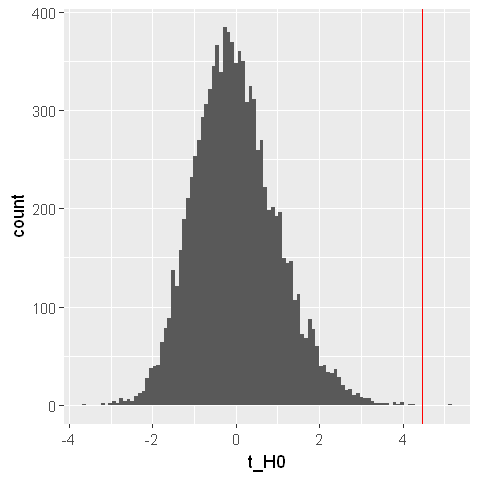

In [79]:
qplot(t_H0, bins = 100) + geom_vline(xintercept = t_stat, color = "red")

## Normalization

In [80]:
head(data_abortion)

abortion,religion,price,laws,funds,educ,income,picket
12.4,38.0,256,0,0,64.3,14082,100
17.7,44.7,332,0,0,75.1,15458,20
9.3,76.7,298,1,0,85.1,15573,0
7.7,9.8,251,0,1,66.0,15598,50
13.5,30.0,248,1,0,66.3,15635,33
13.4,50.9,228,1,0,68.3,15931,60


In [82]:
model <- lm(abortion ~ religion + price + laws + funds + educ + + income + picket, data = data_abortion)
summary(model)


Call:
lm(formula = abortion ~ religion + price + laws + funds + educ + 
    +income + picket, data = data_abortion)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6110  -4.6493  -0.6696   4.5253  15.9514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.2839573 15.0776294   0.947   0.3489    
religion     0.0200709  0.0863805   0.232   0.8174    
price       -0.0423631  0.0222232  -1.906   0.0635 .  
laws        -0.8731018  2.3765662  -0.367   0.7152    
funds        2.8200030  2.7834747   1.013   0.3168    
educ        -0.2872551  0.1995545  -1.439   0.1574    
income       0.0024007  0.0004552   5.274 4.35e-06 ***
picket      -0.1168712  0.0421799  -2.771   0.0083 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.063 on 42 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 7 and 42 DF,  p-value: 2.847e-06


In [83]:
input_numeric <- subset(data_abortion, select= -c(laws, funds, abortion))

In [84]:
head(input_numeric)

religion,price,educ,income,picket
38.0,256,64.3,14082,100
44.7,332,75.1,15458,20
76.7,298,85.1,15573,0
9.8,251,66.0,15598,50
30.0,248,66.3,15635,33
50.9,228,68.3,15931,60


In [92]:
standardize_2sd <- function(x){
    return ((x - mean(x))/sd(x))
}

In [93]:
numeric_standardized <- as.data.frame(lapply(input_numeric, standardize_2sd))

In [94]:
head(numeric_standardized)

religion,price,educ,income,picket
0.4223603,-1.0075823,-1.957998,-1.827015,1.80789409
0.9514953,0.5513805,-0.139737,-1.337298,-1.22675818
3.4787067,-0.1460502,1.543838,-1.296369,-1.98542125
-1.8047450,-1.1101457,-1.671790,-1.287472,-0.08876358
-0.2094427,-1.1716837,-1.621283,-1.274304,-0.73362719
1.4411426,-1.5819371,-1.284568,-1.168957,0.29056796


In [95]:
summary(numeric_standardized)

    religion           price              educ             income       
 Min.   :-1.8047   Min.   :-1.5819   Min.   :-1.9580   Min.   :-1.8270  
 1st Qu.:-0.6991   1st Qu.:-0.6948   1st Qu.:-0.6574   1st Qu.:-0.7581  
 Median :-0.2371   Median :-0.2178   Median : 0.1296   Median :-0.1191  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4757   3rd Qu.: 0.5052   3rd Qu.: 0.7021   3rd Qu.: 0.5793  
 Max.   : 3.4787   Max.   : 3.1975   Max.   : 1.7964   Max.   : 2.8239  
     picket        
 Min.   :-1.98542  
 1st Qu.:-0.49655  
 Median :-0.08876  
 Mean   : 0.00000  
 3rd Qu.: 0.55610  
 Max.   : 1.80789  

In [96]:
cat_response <- data_abortion[ c("abortion", "laws", "funds")]

In [97]:
abortion_std <- cbind.data.frame( c(cat_response, numeric_standardized))

In [103]:
model_std <- lm(abortion ~ religion + price + laws + funds + educ + income + picket,
                data = abortion_std)
summary(model_std)


Call:
lm(formula = abortion ~ religion + price + laws + funds + educ + 
    income + picket, data = abortion_std)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6110  -4.6493  -0.6696   4.5253  15.9514 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.2155     1.5537  13.011 2.51e-16 ***
religion      0.2541     1.0938   0.232   0.8174    
price        -2.0652     1.0834  -1.906   0.0635 .  
laws         -0.8731     2.3766  -0.367   0.7152    
funds         2.8200     2.7835   1.013   0.3168    
educ         -1.7062     1.1853  -1.439   0.1574    
income        6.7454     1.2790   5.274 4.35e-06 ***
picket       -3.0810     1.1120  -2.771   0.0083 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.063 on 42 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 7 and 42 DF,  p-value: 2.847e-06


In [409]:
summary(model)


Call:
lm(formula = abortion ~ religion + price + laws + funds + educ + 
    +income + picket, data = data_abortion)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6110  -4.6493  -0.6696   4.5253  15.9514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.2839573 15.0776294   0.947   0.3489    
religion     0.0200709  0.0863805   0.232   0.8174    
price       -0.0423631  0.0222232  -1.906   0.0635 .  
laws        -0.8731018  2.3765662  -0.367   0.7152    
funds        2.8200030  2.7834747   1.013   0.3168    
educ        -0.2872551  0.1995545  -1.439   0.1574    
income       0.0024007  0.0004552   5.274 4.35e-06 ***
picket      -0.1168712  0.0421799  -2.771   0.0083 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.063 on 42 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 7 and 42 DF,  p-value: 2.847e-06


In [410]:
sd(abortion_std$price)

[1] 1

### Lasso Regression

In [104]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [106]:
x = model.matrix(abortion ~ ., data_abortion)[, -1]
y = data_abortion$abortion

In [107]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)

In [108]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = TRUE) 

      Df   %Dev Lambda
 [1,]  0 0.0000  1e+04
 [2,]  0 0.0000  3e+03
 [3,]  0 0.0000  1e+03
 [4,]  0 0.0000  3e+02
 [5,]  0 0.0000  1e+02
 [6,]  0 0.0000  3e+01
 [7,]  0 0.0000  1e+01
 [8,]  2 0.3392  3e+00
 [9,]  5 0.5142  1e+00
[10,]  6 0.5706  3e-01
[11,]  7 0.5765  1e-01
[12,]  7 0.5773  3e-02
[13,]  7 0.5774  1e-02
[14,]  7 0.5774  3e-03
[15,]  7 0.5774  1e-03
[16,]  7 0.5774  3e-04
[17,]  7 0.5774  1e-04

* Validation Set

In [110]:
train = sample(c(TRUE, FALSE), nrow(data_abortion), rep = TRUE)
test = (!train)

In [111]:
y.test = y[test]

In [112]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x[train, ], y[train], alpha = 1, lambda = grid, standardize = TRUE)

In [113]:
lasso.score <- rep(NA, length(grid))
for (i in 1:length(grid)){
    lasso.pred = predict(lasso.mod, s = grid[i], newx = x[test, ])
    lasso.score[i] = mean((lasso.pred - y.test)^2)
}

In [114]:
lasso.score

[1] 94.89892 94.89892 94.89892 94.89892 94.89892 94.89892 94.89892 67.81096
 [9] 62.73650 54.09381 55.26696 56.17212 56.47607 56.58868 56.61979 56.62993
[17] 56.63301

* K-Fold Cross Validation

In [115]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)
bestlam = lasso.cv$lambda.min

In [116]:
length(grid)

[1] 17

In [117]:
lasso.cv$cvm

[1] 104.63370 104.63370 104.63370 104.63370 104.63370 104.63370 104.63370
 [8]  74.46422  69.99129  68.43472  69.29404  69.82508  70.01890  70.09500
[15]  70.11323  70.12115  70.12340

In [118]:
bestlam

[1] 0.3

In [119]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = TRUE)

In [120]:
lasso.best$beta

7 x 1 sparse Matrix of class "dgCMatrix"
                   s0
religion  .          
price    -0.034200177
laws     -0.555827165
funds     2.446374163
educ     -0.188923992
income    0.002213645
picket   -0.101481870

In [121]:
lasso.best$a0

s0 
7.746337

In [125]:
x = model.matrix(abortion ~ ., abortion_std)[, -1]
y = abortion_std$abortion

In [126]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = FALSE)

In [127]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = FALSE) 

      Df   %Dev Lambda
 [1,]  0 0.0000  1e+04
 [2,]  0 0.0000  3e+03
 [3,]  0 0.0000  1e+03
 [4,]  0 0.0000  3e+02
 [5,]  0 0.0000  1e+02
 [6,]  0 0.0000  3e+01
 [7,]  0 0.0000  1e+01
 [8,]  2 0.3360  3e+00
 [9,]  3 0.5016  1e+00
[10,]  6 0.5661  3e-01
[11,]  7 0.5758  1e-01
[12,]  7 0.5773  3e-02
[13,]  7 0.5774  1e-02
[14,]  7 0.5774  3e-03
[15,]  7 0.5774  1e-03
[16,]  7 0.5774  3e-04
[17,]  7 0.5774  1e-04

In [128]:
train = sample(c(TRUE, FALSE), nrow(data_abortion), rep = TRUE)
test = (!train)

In [129]:
y.test = y[test]

In [130]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x[train, ], y[train], alpha = 1, lambda = grid, standardize = FALSE)

In [131]:
lasso.score <- rep(NA, length(grid))
for (i in 1:length(grid)){
    lasso.pred = predict(lasso.mod, s = grid[i], newx = x[test, ])
    lasso.score[i] = mean((lasso.pred - y.test)^2)
}

In [132]:
lasso.score

[1] 76.58800 76.58800 76.58800 76.58800 76.58800 76.58800 76.58800 59.37194
 [9] 73.07277 86.75071 93.86480 96.97376 97.91941 98.25545 98.35037 98.38274
[17] 98.39398

In [133]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = FALSE)
bestlam = lasso.cv$lambda.min

In [134]:
length(grid)

[1] 17

In [135]:
lasso.cv$cvm

[1] 104.63370 104.63370 104.63370 104.63370 104.63370 104.63370 104.63370
 [8]  73.98720  66.08950  67.64313  68.97179  69.72468  69.96012  70.07244
[15]  70.10558  70.11673  70.12123

In [136]:
bestlam

[1] 1

In [137]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = FALSE)

In [138]:
lasso.best$beta

7 x 1 sparse Matrix of class "dgCMatrix"
                 s0
laws      .        
funds     .        
religion  .        
price    -0.7177953
educ      .        
income    5.3919527
picket   -1.9598708

In [139]:
lasso.best$a0

s0 
20.578